In [ ]:

!apt-get --purge remove "*cublas*" "cuda*" "nsight*"
!nvcc --version

!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!apt-key add /var/cuda-repo-10-2-local-10.2.89-440.33.01/7fa2af80.pub
!apt-get update
!apt-get -y install cuda

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:14 http://security.ubuntu.com/ubuntu 

In [ ]:

! nvidia-smi
! git clone https://github.com/microsoft/GLIP.git
%cd GLIP
! git checkout c663d9db8a503e04c6b76cd2e14152bab775d28a
! pip install torch==1.9.0 torchvision  torchaudio
! pip install einops shapely timm yacs tensorboardX ftfy prettytable pymongo
! pip install transformers
! python setup.py build develop --user
! mkdir MODEL

Sat Nov 19 12:21:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np
pylab.rcParams['figure.figsize'] = 20, 12
from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.engine.predictor_glip import GLIPDemo

def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img, caption):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.figtext(0.5, 0.09, caption, wrap=True, horizontalalignment='center', fontsize=20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:

! wget https://penzhanwu2bbs.blob.core.windows.net/data/GLIPv1_Open/models/glip_tiny_model_o365_goldg_cc_sbu.pth -O MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth
config_file = "configs/pretrain/glip_Swin_T_O365_GoldG.yaml"
weight_file = "MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth"


cfg.local_rank = 0
cfg.num_gpus = 1
cfg.merge_from_file(config_file)
cfg.merge_from_list(["MODEL.WEIGHT", weight_file])
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

--2022-11-19 12:30:02--  https://penzhanwu2bbs.blob.core.windows.net/data/GLIPv1_Open/models/glip_tiny_model_o365_goldg_cc_sbu.pth
Resolving penzhanwu2bbs.blob.core.windows.net (penzhanwu2bbs.blob.core.windows.net)... 20.60.68.132
Connecting to penzhanwu2bbs.blob.core.windows.net (penzhanwu2bbs.blob.core.windows.net)|20.60.68.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3710104213 (3.5G) [application/octet-stream]
Saving to: ‘MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth’

MODEL/glip_tiny_mod 100%[===================>]   3.46G  7.89MB/s    in 8m 27s  

2022-11-19 12:38:30 (6.97 MB/s) - ‘MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth’ saved [3710104213/3710104213]



In [ ]:
glip_demo = GLIPDemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
    show_mask_heatmaps=False
)

VISION BACKBONE USE GRADIENT CHECKPOINTING:  False


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False


Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['bert.pooler.dense.bias', 'cls.predictions.bias', 'bert.pooler.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B


In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from io import BytesIO

import requests
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img, caption):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.figtext(0.5, 0.09, caption, wrap=True, horizontalalignment='center', fontsize=20)

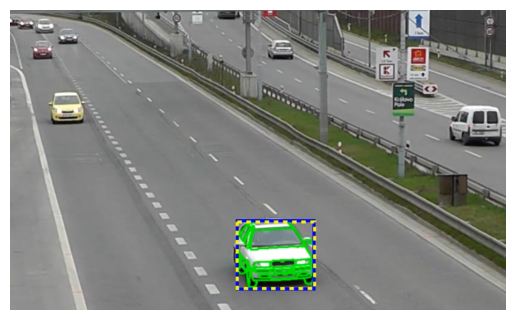

In [13]:
image = load('https://www.google.com/search?q=white+car+detection+using+yolo&sca_esv=599112852&rlz=1C5CHFA_enIN1005IN1015&tbm=isch&sxsrf=ACQVn0_3xGJir0oEGvAqVEUBvw-fRc3l8A:1705492802366&source=lnms&sa=X&ved=2ahUKEwiwopvlr-SDAxVn0KACHbtgCdYQ_AUoAXoECAIQAw&biw=1440&bih=779&dpr=2#imgrc=cYvQm-JRfpA80M')
caption = 'white car '
result, top_prediction = glip_demo.run_on_web_image(image, caption, 0.5)
imshow(image, caption)




In [ ]:
top_prediction.get_field("labels")

tensor([1, 3])

In [ ]:
top_prediction.bbox

tensor([[130.5754,   9.7949, 251.5744,  56.9288],
        [117.3929,  38.5714, 265.6152, 361.6775]])

In [14]:
print(glip_demo.entities)


['white car', 'black-tshirt', 'blue cap']
